In [1]:
from PlateAnalyzer import PlateAnalyzer, logistic_model
import os 
import glob 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
def make_plots(var, column_list, cycles, file_name):
    ## trying to adapt Toan's graphing method for our purposes here
    ## variables required for plotting
    img_rows = 8
    img_cols = 12
    figx_each = 6
    figy_each = 4

    ## generate grid of plots and fill with respective curves
    fig0, axs0 = plt.subplots(img_rows, img_cols, sharex=True, sharey=True,
                              figsize=(figx_each*img_cols, figy_each*img_rows), squeeze=True)
    axs0 = axs0.flatten()

    for i, each in enumerate(column_list):
        each_title = "Well " + each
        axs0[i].plot(cycles, var[each])
        axs0[i].set_title(each_title)

    plt.savefig(file_name + '_plot.pdf')
    plt.show()
    return 1

In [3]:
# Set current directory to folder containing raw data 
path = os.getcwd()
folder = path + "\\raw_data"
csv_files = glob.glob(os.path.join(folder, "*.xlsx"))
os.chdir(folder)
new_path = os.getcwd()

C:\Users\CaitlinAnderson\OneDrive - Global Health Labs\Documents\GitHub\RoboNAAT-Thermocycler-Analysis\PlateAnalyzer.py:18: RuntimeWarning: overflow encountered in exp
  return a/c*(np.exp((2*b+x)/c)-np.exp((b+2*x)/c))/(c*(np.exp(b/c)+np.exp(x/c))**3)
C:\Users\CaitlinAnderson\OneDrive - Global Health Labs\Documents\GitHub\RoboNAAT-Thermocycler-Analysis\PlateAnalyzer.py:18: RuntimeWarning: invalid value encountered in subtract
  return a/c*(np.exp((2*b+x)/c)-np.exp((b+2*x)/c))/(c*(np.exp(b/c)+np.exp(x/c))**3)
C:\Users\CaitlinAnderson\OneDrive - Global Health Labs\Documents\GitHub\RoboNAAT-Thermocycler-Analysis\PlateAnalyzer.py:18: RuntimeWarning: overflow encountered in multiply
  return a/c*(np.exp((2*b+x)/c)-np.exp((b+2*x)/c))/(c*(np.exp(b/c)+np.exp(x/c))**3)
C:\Users\CaitlinAnderson\OneDrive - Global Health Labs\Documents\GitHub\RoboNAAT-Thermocycler-Analysis\PlateAnalyzer.py:18: RuntimeWarning: overflow encountered in power
  return a/c*(np.exp((2*b+x)/c)-np.exp((b+2*x)/c))/(c*(np.e

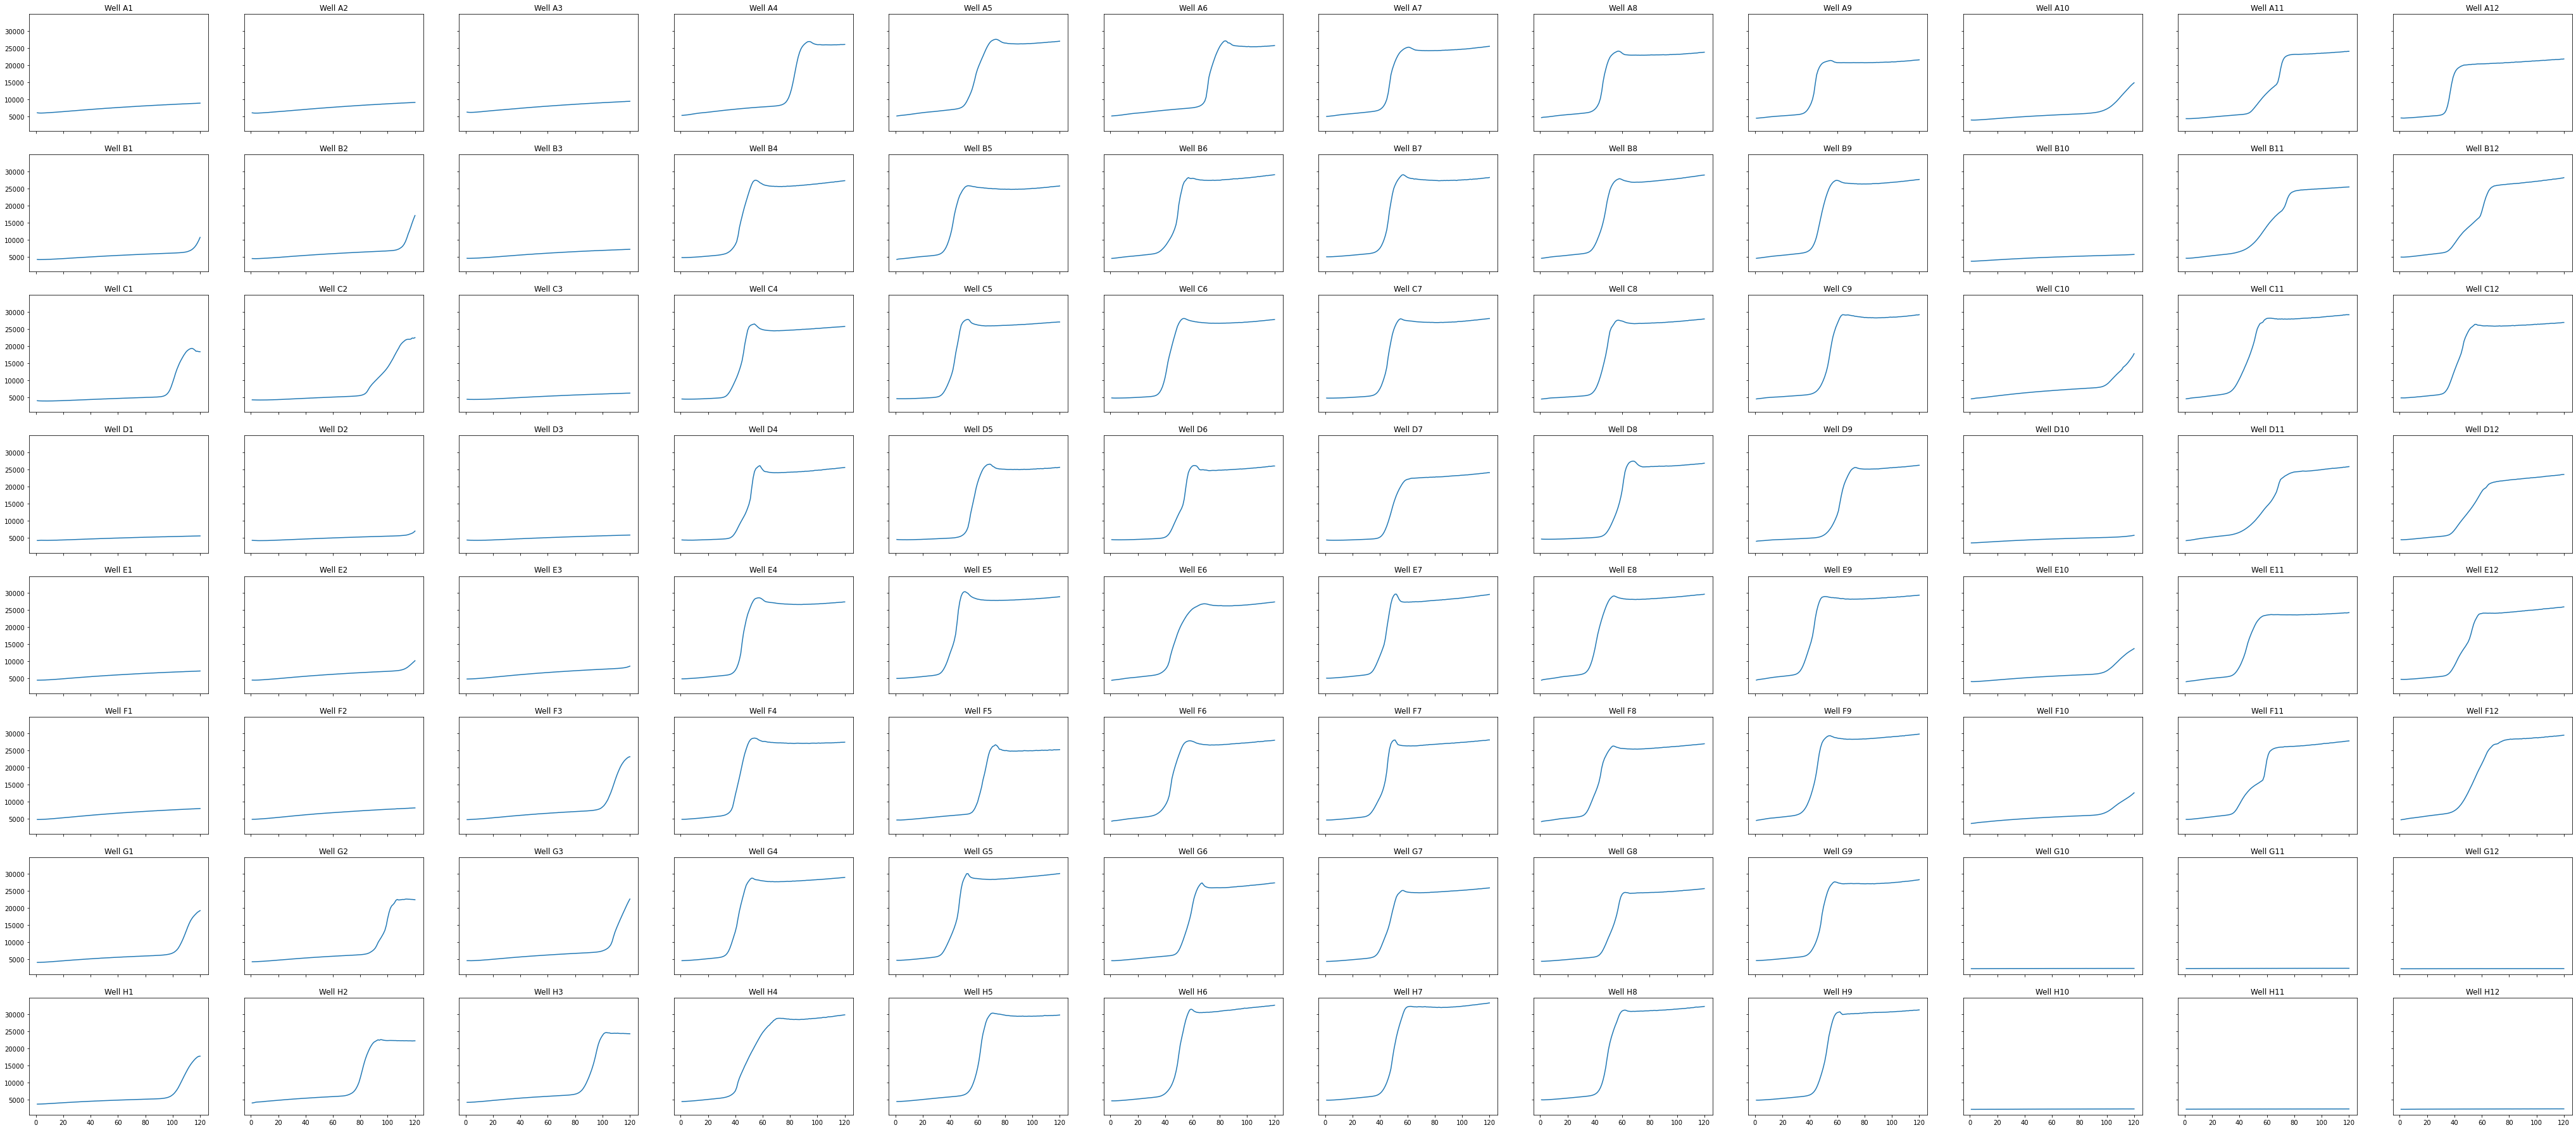

CPU times: total: 27.6 s
Wall time: 28 s


In [4]:
%%time 
for f in csv_files:

    file_name = f.split("\\")[-1]
    pa = PlateAnalyzer(filename=file_name)
    params_df, qoi_df = pa.analyze()
    
    # Generates PDF of all curves in each assay plate
    df = pd.read_excel(file_name)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    cycles = list(df['Cycle'])
    column_list = list(df.columns)
    column_list.remove('Cycle')
    df = df.drop('Cycle', 1)
    plot_vars = make_plots(df, column_list, cycles, file_name)

    # export qoi and params_df files to csv for further processing
    qoi_df.to_csv(file_name[:-5] + '_qoi.csv')
    params_df.to_csv(file_name[:-5] + '_params.csv')